# Ecrire un document computationnel autour du SARS-CoV-2 (Covid-19)

## Contexte

Le but de cet exercice est d'écrire un document computationnel autour du SARS-CoV-2 (Covid-19). Il faut réaliser une représentaion graphique semblable à celles du [South China Morning Post](https://www.scmp.com/) concernant le nombre total de cas de personne atteintes de la maladie du Covid-19 par pays.
Nous nous concentrons sur les données disponibles à cette [adresse](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv).

Dans notre cas nous regarderons les données des pays suivants : la Belgique (Belgium), la Chine - toutes les provinces sauf Hong-Kong (China), Hong Kong (China, Hong-Kong), la France métropolitaine (France), l’Allemagne (Germany), l’Iran (Iran), l’Italie (Italy), le Japon (Japan), la Corée du Sud (Korea, South), la Hollande sans les colonies (Netherlands), le Portugal (Portugal), l’Espagne (Spain), le Royaume-Unis sans les colonies (United Kingdom), les États-Unis (US).

## Exploitation des données

Afin de pouvoir traité ces données en python, il est nécessaire d'importer les bibliothèques python suivantes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Pour ne pas avoir de problème de modification de données entre temps j'enregistre les données localement. Ces données n'évolueront donc pas ce qui évitera des problèmes par la suite. En revanche, la date la plus récentes est le 14/10/2022, date de la sauvegarde local.

In [2]:
# data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_url = "Données Covid 19.csv"

In [3]:
data_raw = pd.read_csv(data_url)

In [25]:
data = data_raw
# display(data)

Une fois nos données disponibles, je vais chercher les lignes des pays nous intéressant avec la fonction `.loc()` de la bibliothèque Pandas. Une fois ces données localisées, je vais les regrouper sous forme de DataFrame afin de pouvoir les traiter.

In [5]:
Row_Belgium = data.loc[data['Country/Region'] == 'Belgium']
Series_Belgium = pd.Series(data.loc[Row_Belgium.index[0]], name = 'Belgium', dtype = int)

In [6]:
Row_China = data.loc[(data['Country/Region'] == 'China') & (data['Province/State'] != 'Hong Kong')]
Series_China_Total = Row_China.sum()

In [7]:
Row_HongKong = data.loc[data['Province/State'] == 'Hong Kong']
Series_HongKong = pd.Series(data.loc[Row_HongKong.index[0]], name = 'HongKong', dtype = int)

In [8]:
Row_France = data.loc[(data['Province/State'].isna()) & (data['Country/Region'] == 'France')]
Series_France = pd.Series(data.loc[Row_France.index[0]], name = 'France', dtype = int)

In [9]:
Row_Germany = data.loc[data['Country/Region'] == 'Germany']
Series_Germany = pd.Series(data.loc[Row_Germany.index[0]], name = 'Germany', dtype = int)

In [10]:
Row_Iran = data.loc[data['Country/Region'] == 'Iran']
Series_Iran = pd.Series(data.loc[Row_Iran.index[0]], name = 'Iran', dtype = int)

In [11]:
Row_Italy = data.loc[data['Country/Region'] == 'Italy']
Series_Italy = pd.Series(data.loc[Row_Italy.index[0]], name = 'Italy', dtype = int)

In [12]:
Row_Japan = data.loc[data['Country/Region'] == 'Japan']
Series_Japan = pd.Series(data.loc[Row_Japan.index[0]], name = 'Japan', dtype = int)

In [13]:
Row_KoreaSouth = data.loc[data['Country/Region'] == 'Korea, South']
Series_KoreaSouth = pd.Series(data.loc[Row_KoreaSouth.index[0]], name = 'Korea, South', dtype = int)

In [14]:
Row_Netherlands = data.loc[(data['Province/State'].isna()) & (data['Country/Region'] == 'Netherlands')]
Series_Netherlands = pd.Series(data.loc[Row_Netherlands.index[0]], name = 'Netherlands', dtype = int)

In [15]:
Row_Portugal = data.loc[data['Country/Region'] == 'Portugal']
Series_Portugal = pd.Series(data.loc[Row_Portugal.index[0]], name = 'Portugal', dtype = int)

In [16]:
Row_Spain = data.loc[data['Country/Region'] == 'Spain']
Series_Spain = pd.Series(data.loc[Row_Spain.index[0]], name = 'Spain', dtype = int)

In [17]:
Row_UnitedKingdom = data.loc[(data['Province/State'].isna()) & (data['Country/Region'] == 'United Kingdom')]
Series_UnitedKingdom = pd.Series(data.loc[Row_UnitedKingdom.index[0]], name = 'United Kingdom', dtype = int)

In [18]:
Row_US = data.loc[data['Country/Region'] == 'US']
Series_US = pd.Series(data.loc[Row_US.index[0]], name = 'US', dtype = int)

In [26]:
frame = {'Belgium': Series_Belgium, 
         'China': Series_China_Total, 
         'Hong Kong': Series_HongKong, 
         'France': Series_France, 
         'Germany': Series_Germany, 
         'Iran': Series_Iran, 
         'Italy': Series_Italy, 
         'Japan': Series_Japan, 
         'Korea, South': Series_KoreaSouth, 
         'Netherlands': Series_Netherlands, 
         'Portugal': Series_Portugal, 
         'Spain': Series_Spain, 
         'United Kingdom': Series_UnitedKingdom, 
         'US': Series_US}

selected_data_raw = pd.DataFrame(frame)
selected_data = selected_data_raw[4:].reset_index()
selected_data = selected_data.rename(columns={'index': 'Date'})
# display(selected_data)

Un fois nos données regroupées dans le DataFrame `selected_data`, je vais alors pouvoir les tracer avec la fonction `.plot()` de la bibliothèque Pandas.

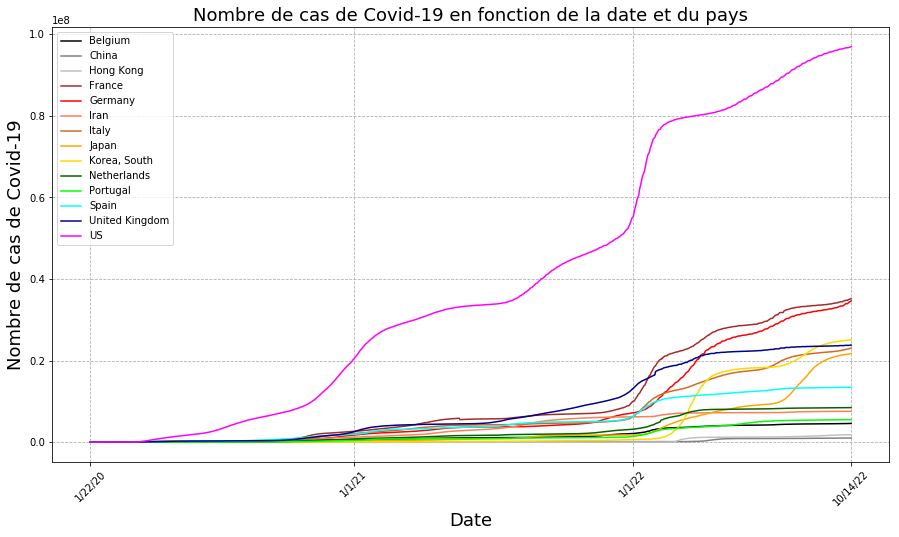

In [27]:
colors = ['black',
          'gray',
          'silver',
          'brown',
          'red',
          'coral',
          'chocolate',
          'orange',
          'gold',
          'darkgreen',
          'lime',
          'cyan',
          'darkblue',
          'magenta'
         ]
selected_data.plot(x = 'Date', 
                   y = ['Belgium','China','Hong Kong',
                        'France','Germany','Iran',
                        'Italy','Japan','Korea, South',
                        'Netherlands','Portugal','Spain',
                        'United Kingdom', 'US'],
                  figsize=(15, 8),
                  color = colors)

plt.title('Nombre de cas de Covid-19 en fonction de la date et du pays', fontsize = 18)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Nombre de cas de Covid-19',fontsize = 18)

plt.xticks([0,345,710,996], 
           [selected_data['Date'][0],
            selected_data['Date'][345],
            selected_data['Date'][710],
            selected_data['Date'][996]],           
           rotation=45)

plt.grid(which='both', linestyle='--')

Nous avons donc un graphique représentant le nombre de cas de Covid-19 en fonction de la date et du pays. Nous allons maintenant refaire ce graphique avec toutes les données de chaque pays selectionné cumulées.

In [21]:
selected_data['Total'] = selected_data['Belgium'] + selected_data['China'] + selected_data['France'] + selected_data['Germany'] + selected_data['Hong Kong'] + selected_data['Iran'] + selected_data['Italy'] + selected_data['Japan'] + selected_data['Korea, South'] + selected_data['Netherlands'] + selected_data['Portugal'] + selected_data['Spain'] + selected_data['US'] + selected_data['United Kingdom']

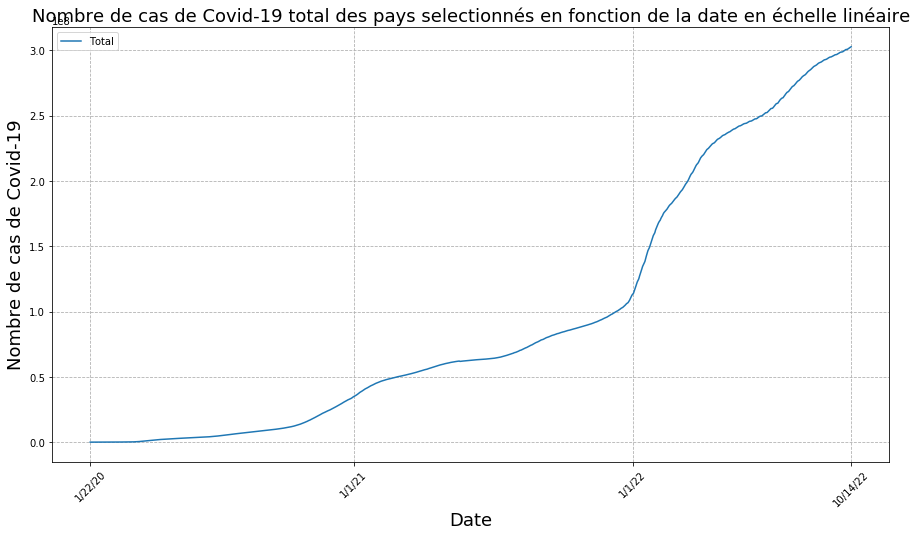

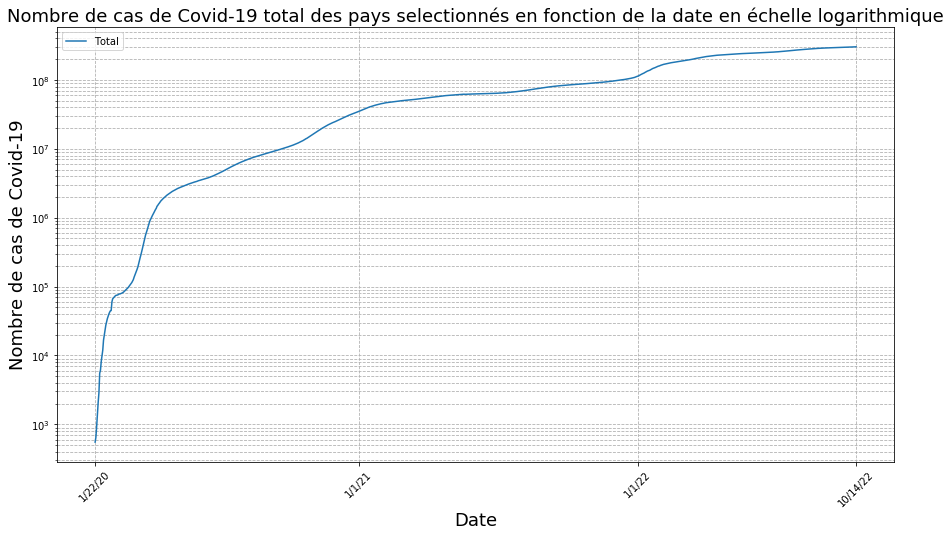

In [22]:
# Echelle linéaire
selected_data.plot(x = 'Date', 
                   y = 'Total',
                  figsize=(15, 8),)

plt.title('Nombre de cas de Covid-19 total des pays selectionnés en fonction de la date en échelle linéaire', fontsize = 18)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Nombre de cas de Covid-19',fontsize = 18)

plt.xticks([0,345,710,996], 
           [selected_data['Date'][0],
            selected_data['Date'][345],
            selected_data['Date'][710],
            selected_data['Date'][996]],           
           rotation=45)

plt.grid(which='both', linestyle='--')
plt.show()

# Echelle logarithmique
selected_data.plot(x = 'Date', 
                   y = 'Total',
                  figsize=(15, 8),)

plt.title('Nombre de cas de Covid-19 total des pays selectionnés en fonction de la date en échelle logarithmique', fontsize = 18)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Nombre de cas de Covid-19',fontsize = 18)
plt.yscale('log')

plt.xticks([0,345,710,996], 
           [selected_data['Date'][0],
            selected_data['Date'][345],
            selected_data['Date'][710],
            selected_data['Date'][996]],           
           rotation=45)

plt.grid(which='both', linestyle='--')
plt.show()